In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercise 2: Implement thuật toán PCA

In [9]:
class PCA_method:
  def __init__(self, n_dimention: int):
    self.n_dimention = n_dimention

  def fit_transform(self, X):
    mean_X = np.mean(X, axis = 0) # tính mean của dataset X
    X = X - mean_X
    cov = X.T.dot(X) / X.shape[0] # tìm ma trận phương sai
    eigen_values, eigen_vectors, = np.linalg.eig(cov) # tìm eigenvector, eigenvalue 
    # lấy chỉ số index của các eigenvalue theo thứ tự từ giảm dần, rồi chọn k eigenvector 
    select_index = np.argsort(eigen_values)[::-1][:self.n_dimention] 
    U = eigen_vectors[:, select_index] # tạo ma trận U tương ứng với k index đã tìm được
    X_new = X.dot(U)
    return X_new

### Exercise 3: Giảm chiều dữ liệu Iris về 2 chiều dùng thuật toán PCA implement ở trên 

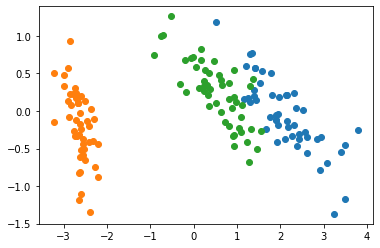

In [20]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris = pd.read_csv(url)
X = iris[["sepal_length",	"sepal_width",	"petal_length",	"petal_width"]].to_numpy()
y = iris["species"].to_numpy()
pca = PCA_method(n_dimention = 2)
X_new = pca.fit_transform(X)
  
for label in set(y):
  X_class = X_new[y == label]
  plt.scatter(X_class[:, 0], X_class[:, 1], label = label)

plt.show()

### Exercise 4: Giảm chiều dữ liệu Iris dùng thuật toán PCA trong sklearn 

In [11]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [18]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris = pd.read_csv(url)
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X)
# X_new

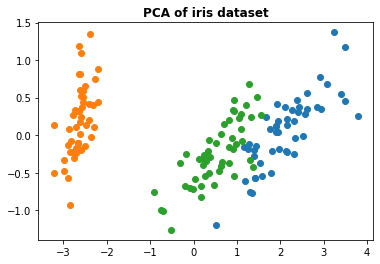

In [16]:
for label in set(y):
  X_class = X_new[y == label]
  plt.scatter(X_class[:, 0], X_class[:, 1], label = label)
  plt.title("PCA of iris dataset", weight = "bold")
plt.show()

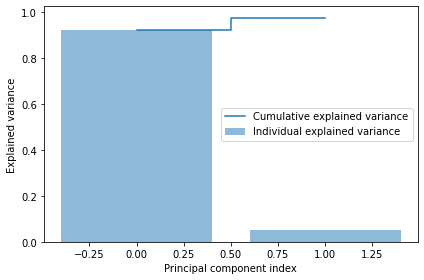

In [17]:
# vẽ explained variance graph 
explained_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(explained_var_pca) # cumulative sum of eigenvalues
plt.bar(range(0, len(explained_var_pca)), explained_var_pca, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where = 'mid',label = 'Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()